In [20]:

import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt

dfTrain= pd.read_csv('dataTrain.csv')
dfTest = pd.read_csv('dataTest.csv')


from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from statistics import mean




columns = dfTrain.columns.tolist()

pciat_cols = dfTrain.columns[dfTrain.columns.str.contains('PCIAT-PCIAT')]


dfTrain = dfTrain.drop(columns=['id'])
dfTest = dfTest.drop(columns=['id'])

X_train = dfTrain.drop(columns=pciat_cols.union(['sii']))
X_test = dfTest.drop(columns=pciat_cols.union(['sii']))
y_train = dfTrain[['sii']]
y_test = dfTest[['sii']]

#splitting dataset on convetional 80%, 20% train test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



## Linear Model (without Regularization)

In [29]:
#Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


print('Training score: {}'.format(lr_model.score(X_train, y_train)))

print('Test score: {}'.format(lr_model.score(X_test, y_test)))

#predicting
y_pred = lr_model.predict(X_test)

#reporting mse

linear_train_pred = lr_model.predict(X_train)
linear_test_pred = lr_model.predict(X_test)
test_mse = mean_squared_error(y_test, linear_test_pred )
train_mse = mean_squared_error(y_train,linear_train_pred  )
print(train_mse)
print(test_mse)


Training score: 0.14339370753373804
Test score: 0.057961562372329856
0.4976362762473088
0.5141755756415912


## Linear Model with Lasso/Ridge Regression

The lambda/alpha parameter for the regularizer determines to what effect the norm of the weights should penalize the model. An alpha of 0 would just be the linear model we had above, with no regularization.

The alpha parameter is a hyperparameter that we should optimize. To do that, one option is just to conduct cross validation, and then we test for multiple different alphas. Whichever alpha gives us the best cross validation score should be the alpha we pick.

In [24]:



# List to maintain the different values of alpha for ridge regularization
alpha_ridge = []

# List to maintain the different cross vals for each alpha
cross_val_scores_ridge = []

# Loop to compute the different values of cross-validation scores
for i in range(-7, 7):
    ridgeModel = Ridge(alpha = 10 ** i)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X_train, y_train, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha_ridge.append(10 ** i)



# List to maintain the different values of alpha for lasso regularization
alpha_lasso = []

# List to maintain the different cross vals for each alpha
cross_val_scores_lasso = []

# Loop to compute the different values of cross-validation scores
for i in range(-7, 7):
    alpha = 10**i
    lassoModel = Lasso(alpha=alpha)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel, X_train, y_train, cv=10)
    avg_cross_val_score = mean(scores) * 100
    cross_val_scores_lasso.append(avg_cross_val_score)
    alpha_lasso.append(alpha)


#grabbing index of alpha with highest cross val
best_alpha_ridge_i = cross_val_scores_ridge.index(max(cross_val_scores_ridge))
best_alpha_lasso_i = cross_val_scores_lasso.index(max(cross_val_scores_lasso))
#printing best alpha along with its cross val value
print("alpha_ridge", alpha_ridge[best_alpha_ridge_i], "crossval", cross_val_scores_ridge[best_alpha_ridge_i])
print("alpha_lasso", alpha_lasso[best_alpha_lasso_i], "crossval", cross_val_scores_lasso[best_alpha_lasso_i])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.259e+02, tolerance: 1.928e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.097e+02, tolerance: 1.724e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.266e+02, tolerance: 1.730e

alpha_ridge 100 crossval 10.525036551478852
alpha_lasso 0.001 crossval 10.047207300976538


In [25]:
alpha_ridge_array = np.array(alpha_ridge)
cross_val_scores_ridge_array = np.array(cross_val_scores_ridge)

Below, we are repeating the code above, but this time we are calculating Train and Test MSEs instead of cross validation scores so we can make a proper fitting graph

In [26]:


# Ridge Regression: Iterating over alpha_ridge
ridge_train_mse_list = []
ridge_test_mse_list = []
for alpha in alpha_ridge:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    ridge_train_pred = ridge_model.predict(X_train)
    ridge_test_pred = ridge_model.predict(X_test)
    ridge_train_mse_list.append(mean_squared_error(y_train, ridge_train_pred))
    ridge_test_mse_list.append(mean_squared_error(y_test, ridge_test_pred))

# Lasso Regression: Iterating over alpha_lasso
lasso_train_mse_list = []
lasso_test_mse_list = []
for alpha in alpha_lasso:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    lasso_train_pred = lasso_model.predict(X_train)
    lasso_test_pred = lasso_model.predict(X_test)
    lasso_train_mse_list.append(mean_squared_error(y_train, lasso_train_pred))
    lasso_test_mse_list.append(mean_squared_error(y_test, lasso_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.259e+02, tolerance: 1.928e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.156e+01, tolerance: 1.928e-01
  model = cd_fast.enet_coordinate_descent(


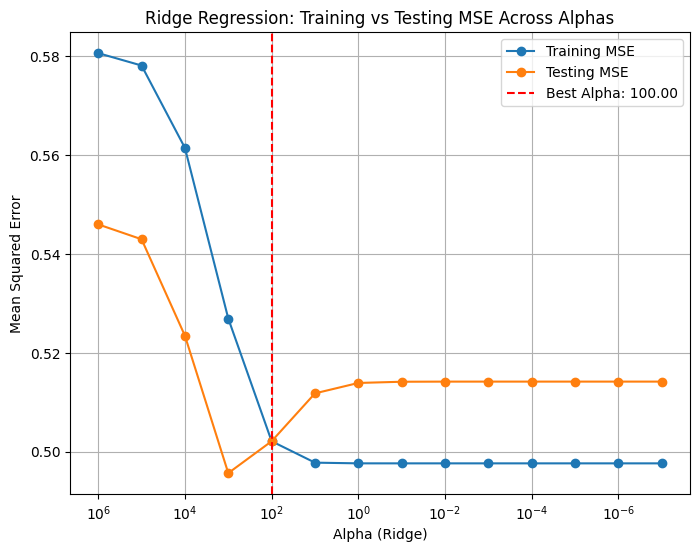

In [27]:
plt.figure(figsize=(8, 6))
plt.plot(alpha_ridge, ridge_train_mse_list, label='Training MSE', marker='o', linestyle='-')
plt.plot(alpha_ridge, ridge_test_mse_list, label='Testing MSE', marker='o', linestyle='-')
plt.axvline(x=alpha_ridge[best_alpha_ridge_i], color='red', linestyle='--', label=f'Best Alpha: {alpha_ridge[best_alpha_ridge_i]:.2f}')
plt.xlabel('Alpha (Ridge)')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: Training vs Testing MSE Across Alphas')
plt.legend()
plt.grid(True)
plt.xscale('log')  # Logarithmic scale for alpha
plt.gca().invert_xaxis()  # Invert x-axis to show increasing alphas from left to right
plt.show()